## Four state Model

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Model Parameter

In [29]:
k_ab,k_ac,k_ad = 0.53,0.62,0.34
k_ba,k_bc,k_bd = 0.37,0.72,0.44
k_ca,k_cb,k_cd = 0.61,0.76,0.53
k_da,k_db,k_dc = 0.35,0.54,0.66
dt = 0.01

### 1. Monte Carlo Simulation

In [30]:
M = {"A": [1-(k_ab + k_ac + k_ad)*dt,   k_ab*dt,   k_ac*dt, k_ad*dt],
     "B": [k_ba*dt,  1-(k_ba + k_bc + k_bd)*dt,    k_bc*dt, k_bd*dt],
     "C": [k_ca*dt,  k_cb*dt,   1 - (k_ca + k_cb + k_cd)*dt, k_cd*dt],
     "D": [k_da*dt,  k_db*dt,   k_dc*dt, 1 - (k_da + k_db + k_dc)*dt]}

states = ["A","B","C", "D"]

In [31]:
M["A"],M["B"],M["C"],M["D"]

([0.9851, 0.0053, 0.0062, 0.0034000000000000002],
 [0.0037, 0.9847, 0.0072, 0.0044],
 [0.0061, 0.0076, 0.981, 0.0053],
 [0.0034999999999999996, 0.0054, 0.006600000000000001, 0.9845])

In [32]:
current_state = "A"
T =1000
N =10000

SS = [["A" for n in range (T)] for t in range(N)]

for n in range(N):
    na,nb,nc,nd =0,0,0,0
    for t in range(T):
        new_state = np.random.choice(states, p = M[current_state])
        #print(new_state)
        SS[n][t] = new_state
        current_state = new_state 

In [33]:
ss = np.array(SS)

In [34]:
Data = []
X = []
for t in range(T):
    X.append(t)
    a = list(ss[:,t]).count("A")/float(N)
    b = list(ss[:,t]).count("B")/float(N)
    c = list(ss[:,t]).count("C")/float(N)
    d = list(ss[:,t]).count("D")/float(N)
    
    Data.append({"A":a,"B":b,"C":c, "D":d})

In [35]:
DF = pd.DataFrame(Data)
DF.head()

,A,B,C,D
0,0.2346,0.2863,0.2580,0.2211
1,0.2351,0.2874,0.2580,0.2195
2,0.2344,0.2884,0.2556,0.2216
3,0.2339,0.2882,0.2565,0.2214
4,0.2341,0.2882,0.2562,0.2215


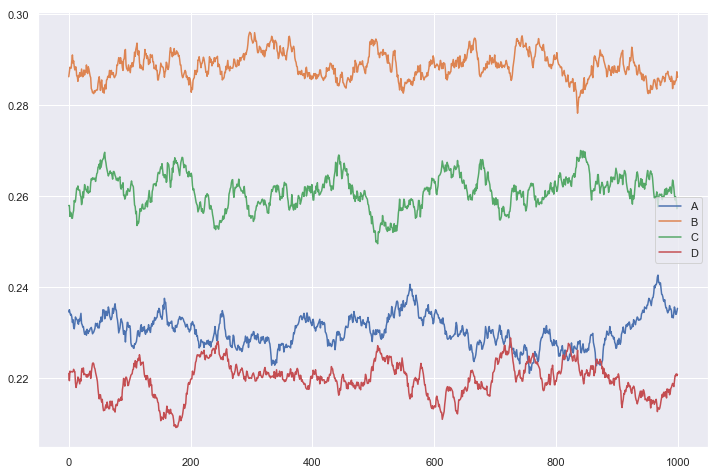

In [36]:
DF.plot(figsize = [12,8])   

In [37]:
A = 0.23021616
B = 0.28749159
C = 0.26095346
D = 0.22999999999999998

### 2. Analytical Solution

$\large{A = \frac{1}{1 + \frac{k_{ab}}{k_{ba}}  + \frac{k_{ac}}{k_{ca}} + \frac{k_{ad}}{k_{da}} }}$

In [53]:
 1/(1+(k_ab/k_ba)+(k_ac/k_ca) + (k_ad/k_da))

0.22623132041537555

-------

$\large{B = \frac{\frac{k_{ab}}{k_{ba}}}{1 + \frac{k_{ab}}{k_{ba}}  + \frac{k_{ac}}{k_{ca}} + \frac{k_{ad}}{k_{da}} }}$

In [54]:
 (k_ab/k_ba)/(1+(k_ab/k_ba)+(k_ac/k_ca) + (k_ad/k_da))

0.3240610805949974

--------

$\large{C = \frac{\frac{k_{ac}}{k_{ca}}}{1 + \frac{k_{ab}}{k_{ba}}  + \frac{k_{ac}}{k_{ca}} + \frac{k_{ad}}{k_{da}} }}$

In [55]:
 (k_ac/k_ca)/(1+(k_ab/k_ba)+(k_ac/k_ca) + (k_ad/k_da))

0.22994003058611942

------------

$\large{D = \frac{\frac{k_{ad}}{k_{da}}}{1 + \frac{k_{ab}}{k_{ba}}  + \frac{k_{ac}}{k_{ca}} + \frac{k_{ad}}{k_{da}} }}$

In [56]:
(k_ad/k_da)/(1+(k_ab/k_ba)+(k_ac/k_ca) + (k_ad/k_da))

0.2197675684035077

### Linear Algebra Approach

In [57]:
B = np.array([[(k_ab + k_ac + k_ad + k_da),   (k_da - k_ba), (k_da -k_ca)],
              [(k_db - k_ab),   (k_ba + k_bc + k_bd + k_db), (k_db - k_cb)],
              [(k_dc - k_ac),   (k_dc - k_bc), (k_ca + k_cb + k_cd + k_dc)]])

b = np.array([k_da,k_db,k_dc])

In [58]:
Binv = np.linalg.inv(B)

In [59]:
np.dot(Binv,b), 1- 0.23 - 0.28 - 0.26

(array([0.23021616, 0.28749159, 0.26095346]), 0.22999999999999998)